## Logistic Regression with PyTorch: Because Nothing Says Simple Like an Exponential Curve

##### So, here we are, tackling the age-old problem of classifying data points into two distinct classes. Clearly, a straight line wasn't dramatic enough,so we opted for logistic regression—a method that bends and twists to fit our needs. And who better to handle this than PyTorch, our favorite deep learning library? Let's walk through this ordeal with as much enthusiasm as one can muster. 🎉

In [136]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

In [137]:
train_ds = MNIST(root = "data/", download = True, transform = transforms.ToTensor(), train = True)
test_ds = MNIST(root = "data/", download = True, transform = transforms.ToTensor(), train = False)

(-0.5, 27.5, 27.5, -0.5)

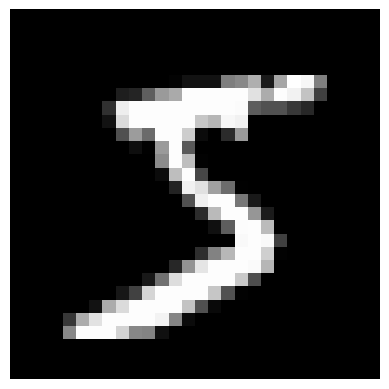

In [138]:
plt.imshow(train_ds[0][0][0], cmap = "gray")
plt.axis("off")

In [139]:
train_ds, val_ds = random_split(train_ds, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [140]:
# Making batches
train_loader = DataLoader(train_ds, batch_size = 128, shuffle = True)
val_loader = DataLoader(val_ds, batch_size = 128, shuffle = True)
test_loader = DataLoader(test_ds, batch_size = 128, shuffle = True)

In [141]:
# Model
input_size = 28*28
num_classes = 10
model = nn.Linear(input_size, num_classes)
list(model.parameters())

[Parameter containing:
 tensor([[ 1.8608e-02,  6.1640e-05, -1.1919e-03,  ...,  2.5430e-02,
          -8.6413e-03,  2.3195e-02],
         [-2.9934e-02, -2.4510e-02,  2.9772e-02,  ...,  2.4595e-02,
           2.6349e-02,  1.0856e-02],
         [ 3.5196e-02, -1.9763e-02,  1.1311e-02,  ..., -2.7567e-02,
           2.1112e-02,  1.0405e-02],
         ...,
         [-1.3567e-02, -1.9061e-02, -2.5994e-02,  ...,  9.3873e-03,
           1.4642e-02,  1.9471e-02],
         [ 6.2262e-03,  1.4067e-02,  9.1545e-03,  ...,  3.1663e-02,
          -1.4710e-02, -3.6055e-03],
         [ 1.8174e-02,  2.9172e-04, -2.4163e-02,  ...,  1.6459e-02,
          -1.3742e-02,  1.4861e-02]], requires_grad=True),
 Parameter containing:
 tensor([-0.0312,  0.0253,  0.0169, -0.0213, -0.0108,  0.0276,  0.0213,  0.0030,
          0.0027,  0.0285], requires_grad=True)]

In [142]:
for images, labels in train_loader:
  images = images.reshape(-1,28*28)
  outputs = model(images)
  break

#### Model Definition with nn.Linear 💻:
The cornerstone of our logistic regression model is a linear layer. Think of nn.Linear as the intellectual equivalent of drawing a straight line, but with all the flair of matrix multiplication. In other words, it takes the input, applies a linear transformation, and spits out an output. It's the brain of our operation 🧠, but let's not pretend it's doing anything more than adding up weighted inputs and a bias term.

In [143]:
class Logistic_regression_MNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)
  def forward(self, x):
    x = x.reshape(-1, 28*28)
    outputs = self.linear(x)
    return outputs

In [144]:
model = Logistic_regression_MNIST()
print(model.linear.weight.shape , model.linear.bias.shape)

torch.Size([10, 784]) torch.Size([10])


In [145]:
for images , labels in train_loader:
  outputs = model(images)
  break

In [146]:
print(f"Output Shape : {outputs.shape}")
print(f"Sample Output : {outputs[:2].data}")

Output Shape : torch.Size([128, 10])
Sample Output : tensor([[ 0.2949,  0.2205,  0.0772,  0.0198,  0.0898,  0.2124,  0.2155, -0.0224,
         -0.0656, -0.1342],
        [ 0.0919,  0.3214, -0.0790,  0.0957,  0.2672, -0.1629, -0.0077,  0.0248,
         -0.0028,  0.0604]])


#### Softmax Function: Making Sure Everything Sums to One 🧮:
Next, we introduce F.softmax into the mix. Why, you ask? Because after all the complex calculations, we need to normalize our results. We want our outputs to look like probabilities, summing to one, rather than some arbitrary numbers. Softmax takes our linear output and graciously transforms it into something that resembles a probability distribution. It's like magic 🎩✨, but with more exponentials and less sleight of hand.

In [147]:
# Applysoftmaxfor each output row
probs = F.softmax(outputs, dim =1 )
print(f"Sample Probabilities : {probs[:2].data}")
print(f"Sum of Probabilities : {probs[0].sum()}")

Sample Probabilities : tensor([[0.1215, 0.1128, 0.0978, 0.0923, 0.0990, 0.1119, 0.1123, 0.0885, 0.0848,
         0.0791],
        [0.1021, 0.1285, 0.0861, 0.1025, 0.1217, 0.0792, 0.0925, 0.0955, 0.0929,
         0.0990]])
Sum of Probabilities : 0.9999999403953552


In [148]:
max_probs, preds = torch.max(probs, dim = 1)
print(f"Predictions : {preds}")
print(f"Max Probabilities : {max_probs}")

Predictions : tensor([0, 1, 0, 1, 6, 0, 1, 0, 6, 6, 0, 7, 0, 6, 0, 0, 1, 0, 1, 0, 6, 3, 6, 1,
        0, 1, 0, 1, 3, 0, 6, 1, 4, 5, 0, 0, 1, 0, 6, 3, 1, 9, 6, 1, 0, 1, 0, 0,
        6, 0, 6, 4, 1, 0, 0, 0, 3, 7, 1, 0, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 0, 4,
        3, 0, 1, 1, 0, 1, 9, 3, 0, 6, 4, 6, 0, 1, 0, 1, 0, 5, 1, 0, 3, 1, 0, 1,
        1, 0, 6, 6, 4, 0, 6, 6, 3, 7, 0, 1, 0, 6, 0, 1, 1, 1, 0, 3, 6, 0, 7, 3,
        1, 1, 3, 1, 3, 6, 0, 5])
Max Probabilities : tensor([0.1215, 0.1285, 0.1257, 0.1495, 0.1185, 0.1965, 0.1238, 0.1211, 0.1314,
        0.1426, 0.1106, 0.1270, 0.1554, 0.1424, 0.1363, 0.1993, 0.1228, 0.1522,
        0.1733, 0.1171, 0.1228, 0.1240, 0.1321, 0.1395, 0.1355, 0.1373, 0.1282,
        0.1391, 0.1244, 0.1267, 0.1291, 0.1366, 0.1209, 0.1495, 0.1206, 0.1248,
        0.1394, 0.1243, 0.1666, 0.1282, 0.1252, 0.1337, 0.1260, 0.1128, 0.1551,
        0.1441, 0.1159, 0.1142, 0.1268, 0.1520, 0.1477, 0.1104, 0.1530, 0.1231,
        0.1251, 0.1202, 0.1437, 0.1311, 0.1575, 0.135

In [149]:
# Accuracy
def accuracy(outputs, label):
  _, preds = torch.max(outputs, dim = 1)
  return torch.tensor(torch.sum(preds == label).item() / len(preds))


#### Can't be used as it's not differentiable and can't be valued in backproagation

##### Cross-Entropy Loss: The Necessary Evil 😈:
F.cross_entropy, our measure of how wrong our model is. This function is like a judgmental friend, constantly pointing out the flaws in our model's predictions. It calculates the difference between the predicted probabilities and the actual classes, providing a single value that tells us just how much our model needs to improve. In simpler terms, it's our guiding compass 🧭, leading us to the mythical land of lower loss.

In [150]:
def cross_entropy(outputs, labels):
  _, preds = torch.max(outputs, dim = 1)
  return F.cross_entropy(outputs, labels)

In [151]:
for _, labels in test_loader:
  print(cross_entropy(outputs, labels))
  break

tensor(2.3089, grad_fn=<NllLossBackward0>)


#### To look at predicted probabilites of correct label, look at the result of  : $${e^{-crossentropy}}$$
#### Lower the loss, better the model


In [152]:
print(f"loss : {torch.exp(torch.tensor(-2.3186))}")

loss : 0.09841126948595047


In [153]:
class Mnist_Logistic_regression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, x):
    outputs = x.reshape(-1, 784) # Reshaping data for input_size
    outputs = self.linear(outputs)  # logistic model
    return outputs

  def training_step(self, batch):
    images, labels = batch
    outputs = self(images) # Generate predictions
    loss = F.cross_entropy(outputs, labels) # calculating loss
    return loss

  def validation_step(self, batch):
    images, labels = batch
    outputs = self(images)
    loss = F.cross_entropy(outputs, labels)
    acc = accuracy(outputs, labels)     # calculating accuracy
    return {"val_loss" : loss, "val_acc" : acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x["val_loss"] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean() # Combining loss
    batch_accs = [x["val_acc"] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean() # cobining accuracy
    return {"val_loss" : epoch_loss.item(), "val_acc" : epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result["val_loss"], result["val_acc"]))


model = Mnist_Logistic_regression()

#### Optimizer Setup: The Art of Gradient Descent 🎨🖌️:
With the loss calculated, we need a way to adjust our model's parameters. Here comes the optimizer, with optim.SGD (Stochastic Gradient Descent) being the loyal workhorse 🐴 of the optimization world. It's simple, it's effective, and it has a learning rate that you'll never get right on the first try. This optimizer takes the calculated gradients and adjusts the weights, nudging our model ever so slightly toward better performance. 🚀

In [154]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)
  return history

#### Backward Propagation: Letting the Gradients Do Their Thing 🌊:
To adjust the weights, we need to compute how much each weight contributed to the loss. This is where backpropagation steps in. It’s like a blame game for the weights—each one gets its fair share of guilt for the current prediction errors. Using loss.backward(), PyTorch automates this process, computing the gradients for us. It's efficient, it's automatic, and it makes us feel smart. 🤓


#### Optimizer Step: Taking a Step in the Right Direction 👣:
After all the gradient calculations, it's time to take a step. The optimizer.step() function is our gentle push towards better accuracy. It adjusts the model’s parameters based on the gradients, moving us closer to the optimal weights. Of course, this step is as good as our learning rate—too big and we overshoot, too small and we crawl. But hey, who doesn't love a little trial and error? 🎯

In [155]:
# Evaluation o dataset before training
res = evaluate(model, val_loader)
res

{'val_loss': 2.389312982559204, 'val_acc': 0.05419303849339485}

In [156]:
# TRAIN THE MODEL
print("history 1")
history1 = fit(5, 0.001, model, train_loader, val_loader)
print("history 2")
history2 = fit(5, 0.001, model, train_loader, val_loader)
print("history 3")
history3 = fit(5, 0.001, model, train_loader, val_loader)

history 1
Epoch [0], val_loss: 1.9989, val_acc: 0.6065
Epoch [1], val_loss: 1.7183, val_acc: 0.7360
Epoch [2], val_loss: 1.5053, val_acc: 0.7746
Epoch [3], val_loss: 1.3455, val_acc: 0.7907
Epoch [4], val_loss: 1.2254, val_acc: 0.8025
history 2
Epoch [0], val_loss: 1.1272, val_acc: 0.8104
Epoch [1], val_loss: 1.0536, val_acc: 0.8164
Epoch [2], val_loss: 0.9862, val_acc: 0.8224
Epoch [3], val_loss: 0.9382, val_acc: 0.8278
Epoch [4], val_loss: 0.8943, val_acc: 0.8318
history 3
Epoch [0], val_loss: 0.8559, val_acc: 0.8345
Epoch [1], val_loss: 0.8198, val_acc: 0.8401
Epoch [2], val_loss: 0.7988, val_acc: 0.8413
Epoch [3], val_loss: 0.7699, val_acc: 0.8458
Epoch [4], val_loss: 0.7500, val_acc: 0.8454


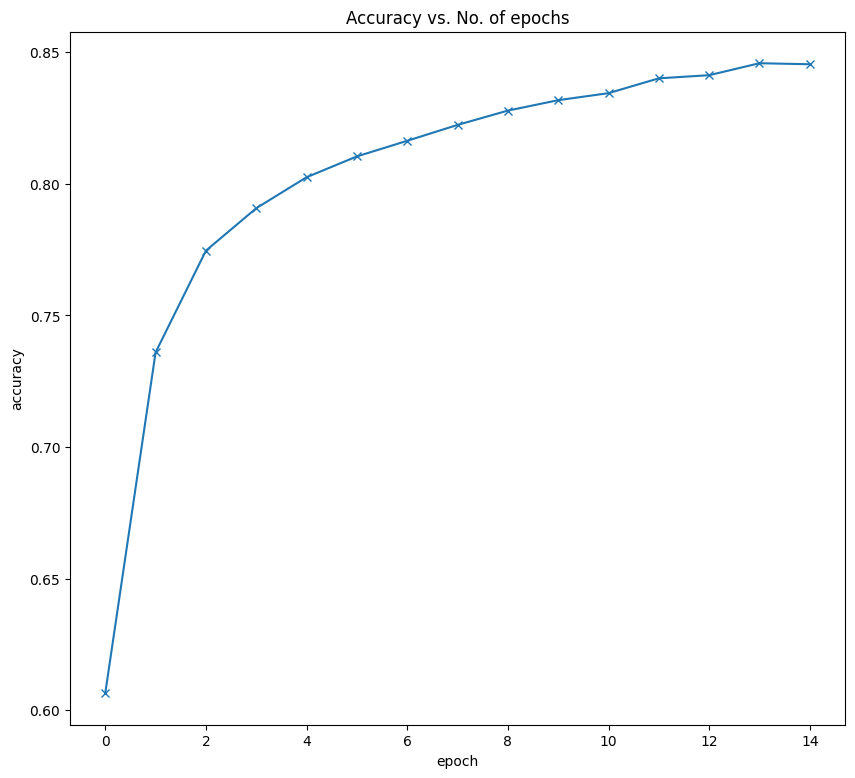

In [157]:
 # plotting the loss and accuracy
plt.figure(figsize = (10,9))
history = history1 + history2 +history3
accuraciesv = [result["val_acc"] for result in history]
plt.plot(accuraciesv, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

### Testing on individual images

Label: 2 , Predicted: 2


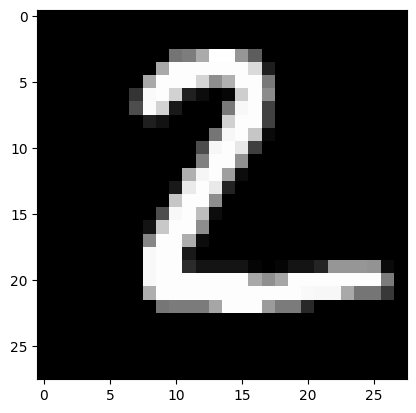

In [158]:
img, label = test_ds[1]
plt.imshow(img[0], cmap = "gray")
print('Label:', label, ', Predicted:', model(img.unsqueeze(0)).argmax().item())

In [159]:
# run on complete test dataset
def predict_image(img, label):
  x = img.unsqueeze(0)
  y = model(x)
  _, predicted = torch.max(y.data, dim = 1)
  print(f"Label : {label}, Predicted : {predicted}")

Label : 7, Predicted : tensor([7])
Label : 2, Predicted : tensor([2])
Label : 1, Predicted : tensor([1])
Label : 0, Predicted : tensor([0])
Label : 4, Predicted : tensor([4])
Label : 1, Predicted : tensor([1])
Label : 4, Predicted : tensor([4])
Label : 9, Predicted : tensor([9])
Label : 5, Predicted : tensor([2])


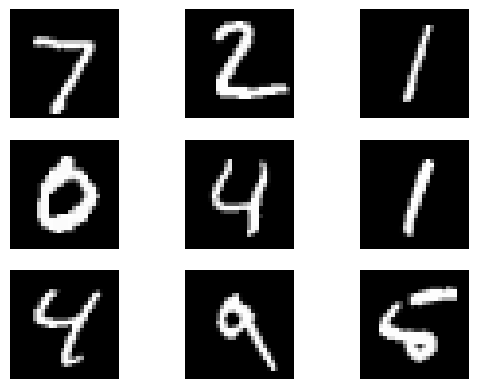

In [160]:
i = 0
for img, label in test_ds:
  if i <= 8:
    plt.subplot(3,3,i+1)
    predict_image(img, label)
    plt.imshow(img[0], cmap = "gray")
    plt.axis("off")
  else:
    break
  i += 1

In [161]:
# Evaluation on test
result = evaluate(model, test_loader)
result

{'val_loss': 0.725789487361908, 'val_acc': 0.8524525165557861}

#### Saving the Model State: Because Losing Progress is a Nightmare 🛟:
Finally, after all the hard work (and countless epochs of training), we save our model's state using torch.save. This function ensures that the next time we want to show off our model's performance, we won't have to retrain it from scratch. We save the state dictionary, which contains all the model's learned parameters. It's like saving a game 🎮; nobody wants to start over from level one.

In [162]:
torch.save(model.state_dict(), "model-mnist-logistic-Weight-bias.pth")

In [163]:
torch.save(model, "model-mnist-logistic-complete.pth")

In [164]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0353,  0.0208,  0.0182,  ...,  0.0031, -0.0252, -0.0315],
                      [ 0.0239,  0.0085, -0.0125,  ..., -0.0320,  0.0278,  0.0053],
                      [ 0.0137, -0.0221,  0.0239,  ...,  0.0189, -0.0188,  0.0258],
                      ...,
                      [-0.0252, -0.0346,  0.0114,  ..., -0.0263,  0.0126,  0.0341],
                      [ 0.0065,  0.0091, -0.0266,  ..., -0.0225, -0.0209,  0.0333],
                      [-0.0002,  0.0173,  0.0238,  ..., -0.0306, -0.0139,  0.0134]])),
             ('linear.bias',
              tensor([-0.0102,  0.1036, -0.0530, -0.0412,  0.0119,  0.0279,  0.0038,  0.0505,
                      -0.0507,  0.0063]))])

In [165]:
# for re-loading the model
model = Mnist_Logistic_regression()
model.load_state_dict(torch.load("model-mnist-logistic.pth"))  # to load model weight

<ipython-input-165-15b3d40190bd>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model-mnist-logistic.pth"))  # to load model weight


<All keys matched successfully>

In [166]:
model.parameters

<bound method Module.parameters of Mnist_Logistic_regression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)>